## Measure of Relatedness

### Covariance

If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, **covariance** provides a measure of how related the variables are to each other:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
x = iris.sepal_length
y = iris.petal_length

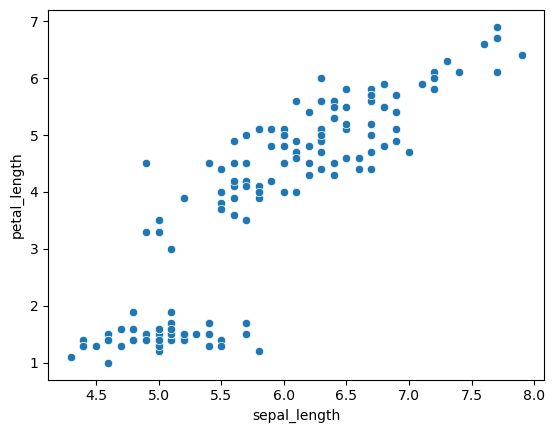

In [5]:
_ = sns.scatterplot(x=x, y=y)

In [6]:
n = len(x)

In [8]:
# x_bar = np.mean(x)
# y_bar = np.mean(y)
x_bar = sum(x)/n
y_bar = sum(y)/n

In [9]:
product = []
for i in range(n):
    product.append((x[i] - x_bar) * (y[i] - y_bar))
    

In [10]:
# we can consider n-1 here, but it is not necessary as the data set is large
cov = sum(product) / n
cov

np.float64(1.2658200000000006)

The NumPy `cov()` method returns a **covariance matrix**, which is a $2 \times 2$ matrix because $x$ and $y$ together describe a two-dimensional space:

In [ ]:
# Built in covariance function
np.cov(x, y, ddof=0) # 0 degree of freedom (ddof  = 1 is the default)

array([[0.68112222, 1.26582   ],
       [1.26582   , 3.09550267]])

The diagonal elements of the covariance matrix repesent the variance of $x$ and $y$, respectively

In [12]:
np.var(x)

np.float64(0.6811222222222223)

In [13]:
np.var(y)

np.float64(3.0955026666666665)

* If there is a positive covariance, then there is a positive relationship between the variables. 
    * Here in our example, as the sepal length gets larger, that corresponds to a larger petal length
* If there was a negative covariance, then there would be a inverse relationship between the variables.
    * For example, if sepal length got larger, and that corresponds to decreasing size of petal length
* The less related the variables are, the closer their covariance is to zero

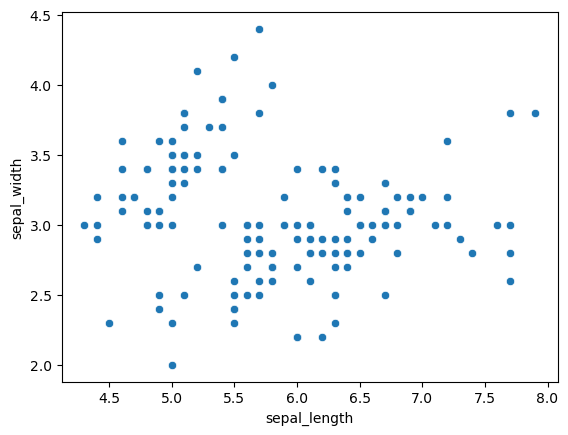

In [15]:
_ = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [17]:
np.cov(iris.sepal_length, iris.sepal_width, ddof=0)

array([[ 0.68112222, -0.04215111],
       [-0.04215111,  0.18871289]])

### Correlation

A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness. **Correlation** builds on covariance and overcomes this drawback via rescaling, thereby measuring relatedness exclusively. Correlation is much more common because of this difference.

The correlation coefficient (developed by Karl Pearson in the 20th c. though known in the 19th c.) is often denoted with $r$ or $\rho$ (rho) and is defined by:
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

In [18]:
cov = np.cov(iris.sepal_length, iris.sepal_width, ddof=0)
cov = cov[0][1]
cov

np.float64(-0.042151111111111104)

In [19]:
sigma_sq_x = np.var(iris.sepal_length)
sigma_sq_y = np.var(iris.sepal_width)
sigma_sq_x, sigma_sq_y

(np.float64(0.6811222222222223), np.float64(0.1887128888888889))

In [22]:
# standard deviation of x and y
sigma_x = np.sqrt(sigma_sq_x)
sigma_y = np.sqrt(sigma_sq_y)

# correlation coefficient
r = cov / (sigma_x * sigma_y)
r

np.float64(-0.11756978413300202)

In [23]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

PearsonRResult(statistic=np.float64(-0.11756978413300204), pvalue=np.float64(0.1518982607114478))

The second value output of `pearsonr` is a measure of statistical significance, which we'll detail in *Intro to Stats*.

$\rho$ has a range of -1 to 1, with values closer to zero indicating less correlation:

In [24]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]

np.float64(-0.11756978413300204)

The closer $\rho$ is to 1 or -1, the stronger the positive or negative correlation, respectively:

In [25]:
st.pearsonr(iris.sepal_length, iris.petal_length)[0]

np.float64(0.8717537758865831)

N.B.: Covariance and correlation only account for linear relationships. Two variables could be non-linearly related to each other and these metrics could come out as zero.